In [434]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

In [435]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

In [436]:
train_data.head()

,rent,bedroom,livingroom,bathroom,area,room,floor_grp,subway,region,heating
0,2330,3,1,1,15,主卧,低楼层,是,通州,集中供暖
1,2860,3,1,1,15,主卧,中楼层,是,昌平,集中供暖
2,2430,3,1,1,14,主卧,中楼层,是,朝阳,自采暖
3,1830,3,1,1,10,次卧,低楼层,是,房山,自采暖
4,2710,2,1,1,10,次卧,低楼层,是,朝阳,集中供暖


In [437]:
test_data.head()

,rent,bedroom,livingroom,bathroom,area,room,floor_grp,subway,region,heating
0,2730,2,1,1,12,主卧,高楼层,是,通州,集中供暖
1,2650,4,1,1,8,次卧,低楼层,是,丰台,集中供暖
2,2000,2,1,1,10,次卧,高楼层,是,大兴,集中供暖
3,2780,4,1,1,13,主卧,中楼层,是,朝阳,集中供暖
4,2790,4,1,1,10,次卧,低楼层,是,昌平,集中供暖


In [438]:
train_data.describe()

,rent,bedroom,livingroom,bathroom,area
count,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000
mean,2798.343507,2.995838,1.009434,1.024972,12.853219
std,766.521027,0.799482,0.096683,0.156062,4.165643
min,1150.000000,2.000000,1.000000,1.000000,5.000000
25%,2230.000000,2.000000,1.000000,1.000000,10.000000
50%,2690.000000,3.000000,1.000000,1.000000,12.000000
75%,3222.500000,4.000000,1.000000,1.000000,15.000000
max,6160.000000,5.000000,2.000000,2.000000,30.000000


In [439]:
test_data.describe()

,rent,bedroom,livingroom,bathroom,area
count,1545.00000,1545.000000,1545.000000,1545.000000,1545.000000
mean,2795.63754,2.995469,1.009709,1.030421,12.847249
std,752.99256,0.798707,0.098085,0.171798,4.177874
min,1190.00000,2.000000,1.000000,1.000000,5.000000
25%,2260.00000,2.000000,1.000000,1.000000,10.000000
50%,2690.00000,3.000000,1.000000,1.000000,12.000000
75%,3230.00000,4.000000,1.000000,1.000000,15.000000
max,6460.00000,5.000000,2.000000,2.000000,30.000000


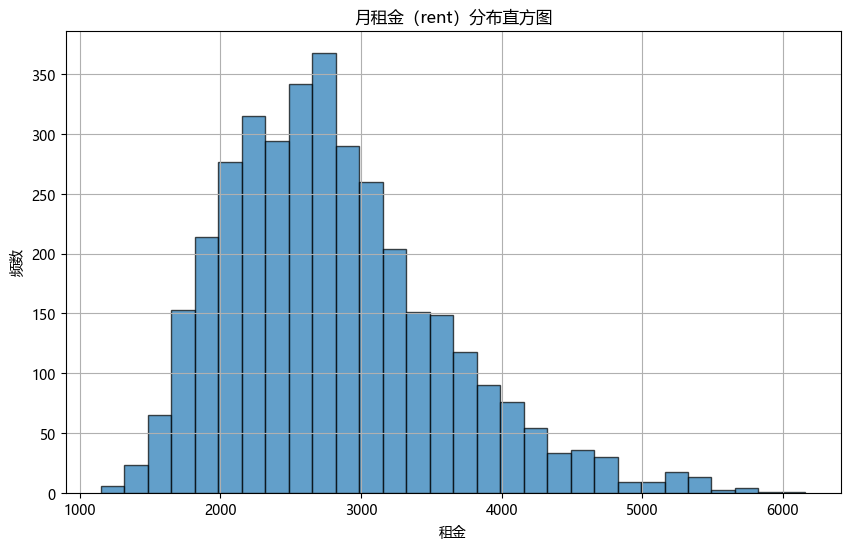

In [440]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['rent'], bins=30, edgecolor='k', alpha=0.7)
plt.title('月租金（rent）分布直方图')
plt.xlabel('租金')
plt.ylabel('频数')
plt.grid(True)
plt.show()

**简要分析**
1. 租金主要分布在 2000-3500 之间, 频数最高的区间大约是 2600 元
2. 直方图呈现右偏趋势, 有少量租金较高的房源

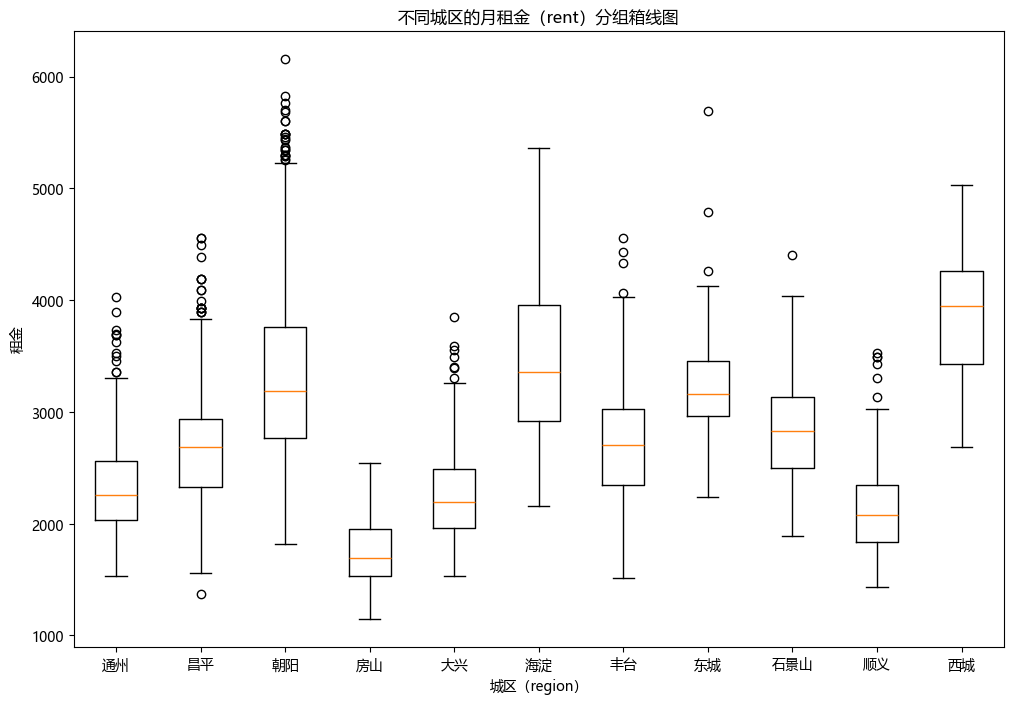

In [441]:
regions = train_data['region'].unique()
rent_by_region = [train_data[train_data['region'] == region]['rent'] for region in regions]
plt.figure(figsize=(12, 8))
plt.boxplot(rent_by_region, tick_labels=regions)
plt.title('不同城区的月租金（rent）分组箱线图')
plt.xlabel('城区（region）')
plt.ylabel('租金')
plt.show()

**简要分析**
1. **朝阳区**：朝阳区的租金中位数较高，四分位距较大，说明租金在不同房源间的差异较大。它有不少高租金的异常值，表明有不少高价房源。
2. **西城区**：西城区的租金中位数较高，与朝阳区相近，但分布范围较为集中。四分位距较小，表明租金差异较小，大部分房源的租金较为一致。
3. **通州区**、**昌平区**、**大兴区**、**房山区**：这些区域的租金相对较低，其中房山区的租金中位数最低。这些区域的四分位距较小，说明这些区域的租金分布较为集中，且价格较为适中。
4. **海淀区**：租金中位数与朝阳、西城相似，但四分位距和异常值更多，显示出海淀区房价的差异化较大，有部分高价房源。
5. **丰台区**：丰台区的租金中位数也比较高，分布较广，显示出房价存在较大差异。
东城区：东城区的租金中位数较高，但四分位距较小，显示大多数房源价格较集中。
6. **石景山区**、**顺义区**：这两个区域的租金较为中等，且四分位距适中，说明租金分布范围较为均匀。

In [442]:
X = train_data.drop(['rent'], axis=1)
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)
X = X.values
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = train_data['rent'].values.reshape(-1, 1)

In [443]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print("beta_hat:")
pd.DataFrame(beta_hat)

beta_hat:


,0
0,2196.094140
1,-101.752247
2,-212.558099
3,207.196384
4,76.292545
5,-17.539118
6,47.710990
7,44.073344
8,279.644619
9,-489.364168


In [444]:
y_pred = X @ beta_hat
residuals = y - y_pred
MSE = np.mean(residuals**2)
print(f"MSE = {MSE}")

MSE = 200419.47721842467


In [445]:
def ridge_regression(X, y, lambda_reg):
    p = X.shape[1]
    I = np.eye(p)
    XtX = X.T @ X
    XtX_plus_lambdaI = XtX + lambda_reg * I
    XtX_plus_lambdaI_inv = np.linalg.inv(XtX_plus_lambdaI)
    beta_ridge = XtX_plus_lambdaI_inv @ X.T @ y
    return beta_ridge

In [446]:
def cross_validate_ridge(X, y, lambdas, k=10):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_lambdas = []
    
    for lambda_reg in lambdas:
        mse_folds = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            beta_ridge = ridge_regression(X_train, y_train, lambda_reg)
            
            y_val_pred = X_val @ beta_ridge
            
            mse = np.mean((y_val - y_val_pred) ** 2)
            mse_folds.append(mse)
        
        mse_avg = np.mean(mse_folds)
        mse_lambdas.append(mse_avg)
    
    return mse_lambdas

In [447]:
lambdas = np.logspace(-2, -1.5, 50)

mse_lambdas = cross_validate_ridge(X, y, lambdas, k=10)

optimal_lambda = lambdas[np.argmin(mse_lambdas)]
print(f"最优的 lambda 值: {optimal_lambda}")

最优的 lambda 值: 0.022229964825261943


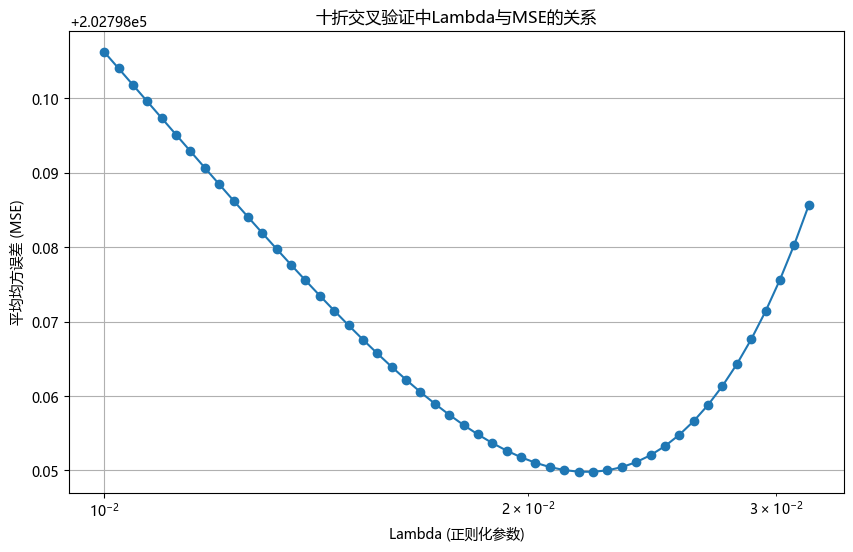

In [448]:
plt.figure(figsize=(10, 6))
plt.plot(lambdas, mse_lambdas, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (正则化参数)')
plt.ylabel('平均均方误差 (MSE)')
plt.title('十折交叉验证中Lambda与MSE的关系')
plt.grid(True)
plt.show()

In [449]:
beta_final = ridge_regression(X, y, optimal_lambda)
print("最终模型的回归系数 (beta_final):")
pd.DataFrame(beta_final)

最终模型的回归系数 (beta_final):


,0
0,2191.337635
1,-101.710584
2,-210.943029
3,207.232679
4,76.310027
5,-17.425862
6,47.758053
7,44.083271
8,279.763191
9,-486.853361


In [454]:
X_test = test_data.drop(['rent'], axis=1)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.astype(float)
X_test = X_test.values
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_test = test_data['rent'].values.reshape(-1, 1)

y_test_pred = X_test @ beta_final

MSE_test = np.mean((y_test - y_test_pred) ** 2)
print(f"测试集上的均方误差 (MSE): {MSE_test:.2f}")

测试集上的均方误差 (MSE): 218396.74
